# Ejercicio 13: Resolver una EDO

Resolver y graficar los resultados de la siguiente EDO usando los metodos de Euler, Series de Taylor y RK4:

$$y'(t) = -2y(t) + \cos(4t)$$

con condición inicial $y_0 = 3$, donde por cada metodo debe generar un grafico con al menos tres curvas que representen 
distintos valores de $h$ tal que las lineas dibujadas representen a $y(t)$ con diferente presicion, ejemplo: resolver para $h = 0.8$, $h = 0.2$ y $h = 0.02$ con $t\in(0, 2)$


## Método de Euler

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h(-2y_i + \cos(4t))$


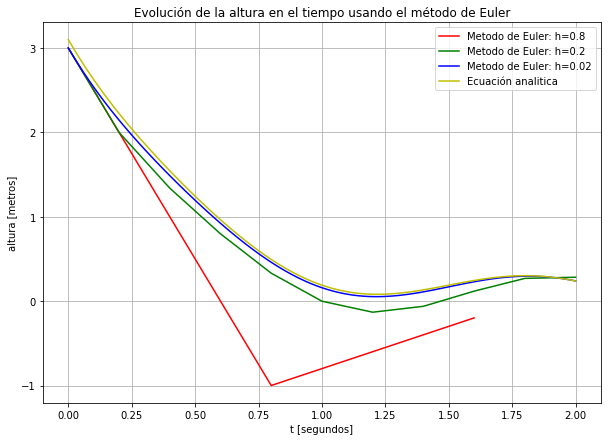

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

hache = [0.8, 0.2, 0.02]
time = 2
y0=3
y_lines=[]
tes=[]

for h in hache:
  iterations = int(time / h)+1

  t_values = np.zeros(iterations)
  y_values = np.zeros(iterations)
  function = lambda t : np.cos(4*t)

  for i in range(iterations):
      if i == 0:
          t_values[i] = 0
          y_values[i] = y0
      else:
          t_values[i] = t_values[i - 1] + h
          y_values[i] = y_values[i - 1] + h*(function(t_values[i - 1]) - 2*y_values[i - 1])
  
  tes.append(t_values)
  y_lines.append(y_values)

fig, ax = plt.subplots(figsize=(10,7))

yA = y0*np.exp(-2*tes[2]) + np.sin(4*tes[2])/5 + np.cos(4*tes[2])/10

ax.plot(tes[0], y_lines[0], 'r', label = 'Metodo de Euler: h=0.8')
ax.plot(tes[1], y_lines[1], 'g', label = 'Metodo de Euler: h=0.2')
ax.plot(tes[2], y_lines[2], 'b', label = 'Metodo de Euler: h=0.02')
ax.plot(tes[2], yA, 'y',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando el método de Euler')
ax.legend()
ax.grid()

plt.show()

## Método de Series de Taylor

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h T_2(t_i, y_i)$

Donde:

$$
T_2(t_i, y_i) = f(t_i, y_i) + \frac{1}{2!}h^2f'(t_i,y_i)
$$

$$
f'(t, y) = \frac{\partial}{\partial{t}}f(t, y) + \frac{\partial}{\partial{y}}f(t, y)\frac{\partial{y}}{\partial{t}}
$$

Por lo tanto:

$$
T_2(t_i, y_i) = (-2y_i + \cos(4t_i)) + \frac{1}{2!}h^2(- 4sen(4t_i) - 2)
$$

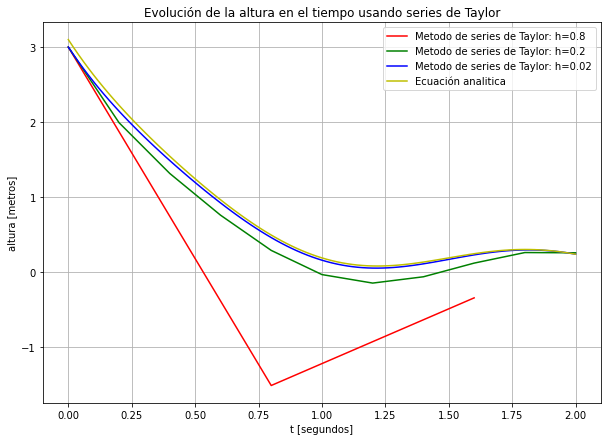

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

hache = [0.8, 0.2, 0.02]
time = 2
y0=3
y_lines=[]
tes=[]

for h in hache:
  iterations = int(time / h)+1

  t_values = np.zeros(iterations)
  y_values = np.zeros(iterations)
  function = lambda t : np.cos(4*t)
  function2 = lambda t : (1/2)*h*h*( -4*np.sin(4*t) - 2 )

  for i in range(iterations):
      if i == 0:
          t_values[i] = 0
          y_values[i] = y0
      else:
          t_values[i] = t_values[i - 1] + h
          y_values[i] = y_values[i - 1] + h*(function(t_values[i - 1]) - 2*y_values[i - 1] + function2(t_values[i - 1]))
  tes.append(t_values)
  y_lines.append(y_values)

fig, ax = plt.subplots(figsize=(10,7))

yA = y0*np.exp(-2*tes[2]) + np.sin(4*tes[2])/5 + np.cos(4*tes[2])/10

ax.plot(tes[0], y_lines[0], 'r', label = 'Metodo de series de Taylor: h=0.8')
ax.plot(tes[1], y_lines[1], 'g', label = 'Metodo de series de Taylor: h=0.2')
ax.plot(tes[2], y_lines[2], 'b', label = 'Metodo de series de Taylor: h=0.02')
ax.plot(tes[2], yA, 'y',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando series de Taylor')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta de 4 etapas

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + \frac{h}{6}\left[K_1(t_i, y_i) + 2K_2(t_i, y_i) + 2K_3(t_i, y_i) + K_4(t_i, y_i)\right]$

Donde:

$$
K_1(t_i, y_i) = f(t_i, y_i) =  \cos(4t_i) - 2y_i
$$

$$
K_2(t_i, y_i) = f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2}K_1(t_i, y_i)\right) = \cos\left(4t_i + 2h\right) - 2y_i - h\left(\cos(4t_i) - 2y_i\right)
$$

$$
K_3(t_i, y_i) = f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2}K_2(t_i, y_i)\right) = \cos\left(4t_i + 2h\right) - 2y_i -h\left(\cos\left(4t_i + 2h\right) - 2y_i - h\left(\cos(4t_i) - 2y_i\right)\right)
$$

$$
K_4(t_i, y_i) = f\left(t_i + h, y_i + hK_3(t_i, y_i)\right) = \cos\left(4t_i + 4h\right) - 2y_i - 2h\left(\cos\left(4t_i + 2h\right) - 2y_i -h\left(\cos\left(4t_i + 2h\right) - 2y_i - h\left(\cos(4t_i) - 2y_i\right)\right)\right)
$$


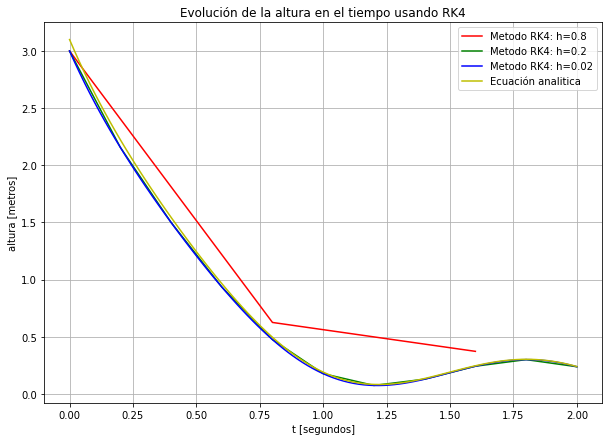

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

hache = [0.8, 0.2, 0.02]
time = 2
y0=3
y_lines=[]
tes=[]

for h in hache:
  iterations = int(time / h)+1

  t_values = np.zeros(iterations)
  y_values = np.zeros(iterations)
  function = lambda t, y : np.cos(4*t) - 2*y

  for i in range(iterations):
      if i == 0:
          t_values[i] = 0
          y_values[i] = y0
      else:
          t_values[i] = t_values[i - 1] + h
          k1 = function(t_values[i - 1], y_values[i - 1])
          k2 = function(t_values[i - 1] + (h/2), y_values[i - 1] + h/2*k1)
          k3 = function(t_values[i - 1] + (h/2), y_values[i - 1] + h/2*k2)
          k4 = function(t_values[i - 1] + h, y_values[i - 1] + h*k3)

          y_values[i] = y_values[i - 1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

  tes.append(t_values)
  y_lines.append(y_values)

fig, ax = plt.subplots(figsize=(10,7))

yA = y0*np.exp(-2*tes[2]) + np.sin(4*tes[2])/5 + np.cos(4*tes[2])/10

ax.plot(tes[0], y_lines[0], 'r', label = 'Metodo RK4: h=0.8')
ax.plot(tes[1], y_lines[1], 'g', label = 'Metodo RK4: h=0.2')
ax.plot(tes[2], y_lines[2], 'b', label = 'Metodo RK4: h=0.02')
ax.plot(tes[2], yA, 'y',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK4')
ax.legend()
ax.grid()

plt.show()